#flight prediction

In [76]:
import pandas as pd 
import  numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [32]:
import pandas as pd
train_df=pd.read_excel('E:/PYTHON/DAY 2 (13-8-25)/Data_Train.xlsx')
print(train_df)

           Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun

In [33]:
test_df=pd.read_excel('E:/PYTHON/DAY 2 (13-8-25)/Data_Train.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [34]:
final_df=pd.concat([train_df,test_df],ignore_index=True)
final_df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [35]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
21361,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
21362,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
21363,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
21364,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
21365,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [36]:

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21366 entries, 0 to 21365
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          21366 non-null  object
 1   Date_of_Journey  21366 non-null  object
 2   Source           21366 non-null  object
 3   Destination      21366 non-null  object
 4   Route            21364 non-null  object
 5   Dep_Time         21366 non-null  object
 6   Arrival_Time     21366 non-null  object
 7   Duration         21366 non-null  object
 8   Total_Stops      21364 non-null  object
 9   Additional_Info  21366 non-null  object
 10  Price            21366 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.8+ MB


In [37]:
#feature engineering
final_df['Date_of_Journey'].str.split('/').str[0]


0        24
1         1
2         9
3        12
4        01
         ..
21361     9
21362    27
21363    27
21364    01
21365     9
Name: Date_of_Journey, Length: 21366, dtype: object

In [38]:
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

In [39]:
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [ ]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21366 entries, 0 to 21365
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          21366 non-null  object
 1   Date_of_Journey  21366 non-null  object
 2   Source           21366 non-null  object
 3   Destination      21366 non-null  object
 4   Route            21364 non-null  object
 5   Dep_Time         21366 non-null  object
 6   Arrival_Time     21366 non-null  object
 7   Duration         21366 non-null  object
 8   Total_Stops      21364 non-null  object
 9   Additional_Info  21366 non-null  object
 10  Price            21366 non-null  int64 
 11  Date             21366 non-null  object
 12  Month            21366 non-null  object
 13  Year             21366 non-null  object
dtypes: int64(1), object(13)
memory usage: 2.3+ MB


In [41]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)
final_df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,06,2019
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,03,2019
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,01,03,2019
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,03,2019
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,05,2019


In [42]:
final_df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
21361    22:25
21362    23:20
21363    11:20
21364    14:10
21365    19:15
Name: Arrival_Time, Length: 21366, dtype: object

In [ ]:
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x: x.split(' ')[0])

In [43]:
final_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              2
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        2
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
dtype: int64

In [ ]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]

In [44]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019


In [ ]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)

In [46]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [47]:
final_df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,01,03,2019


In [48]:
final_df['Dept_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dept_min']=final_df['Dep_Time'].str.split(':').str[1]
final_df['Dept_hour']=final_df['Dept_hour'].astype(int)
final_df['Dept_min']=final_df['Dept_min'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace=True)

In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21366 entries, 0 to 21365
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          21366 non-null  object
 1   Source           21366 non-null  object
 2   Destination      21366 non-null  object
 3   Route            21364 non-null  object
 4   Duration         21366 non-null  object
 5   Total_Stops      21364 non-null  object
 6   Additional_Info  21366 non-null  object
 7   Price            21366 non-null  int64 
 8   Date             21366 non-null  object
 9   Month            21366 non-null  object
 10  Year             21366 non-null  object
 11  Dept_hour        21366 non-null  int64 
 12  Dept_min         21366 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 2.1+ MB


In [51]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stop':2,'3 stops':3,'4 stops':4,'nan'})

In [54]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_hour,Dept_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,05,2019,9,45
19722,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,05,2019,9,45


In [ ]:
final_df.drop('Route',axis=1,inplace=True)

In [56]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,2019,16,50


In [57]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [58]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21366 entries, 0 to 21365
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          21366 non-null  object
 1   Source           21366 non-null  object
 2   Destination      21366 non-null  object
 3   Route            21364 non-null  object
 4   Duration         21366 non-null  object
 5   Total_Stops      21364 non-null  object
 6   Additional_Info  21366 non-null  object
 7   Price            21366 non-null  int64 
 8   Date             21366 non-null  object
 9   Month            21366 non-null  object
 10  Year             21366 non-null  object
 11  Dept_hour        21366 non-null  int64 
 12  Dept_min         21366 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 2.1+ MB


In [61]:
final_df['duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [62]:
final_df[final_df['duration_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_hour,Dept_min,duration_hour
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,03,2019,16,50,5m
17157,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,03,2019,16,50,5m


In [63]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(17157,axis=0,inplace=True)

In [64]:
final_df['duration_hour']=final_df['duration_hour'].astype('int')

In [65]:
final_df.drop('Duration',axis=1,inplace=True)

In [66]:
final_df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_hour,Dept_min,duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,03,2019,22,20,2


In [67]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [80]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

In [81]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [82]:
final_df.shape

(21364, 13)

In [83]:
final_df = final_df.dropna(subset=['Price'])

In [84]:

final_df.shape


(21364, 13)

In [85]:

final_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_hour,Dept_min,duration_hour
0,3,0,5,BLR → DEL,non-stop,8,3897,24,03,2019,22,20,2
1,1,3,0,CCU → IXR → BBI → BLR,2 stops,8,7662,1,05,2019,5,50,7
2,4,2,1,DEL → LKO → BOM → COK,2 stops,8,13882,9,06,2019,9,25,19
3,3,3,0,CCU → NAG → BLR,1 stop,8,6218,12,05,2019,18,5,5
4,3,0,5,BLR → NAG → DEL,1 stop,8,13302,01,03,2019,16,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21361,0,3,0,CCU → BLR,non-stop,8,4107,9,04,2019,19,55,2
21362,1,3,0,CCU → BLR,non-stop,8,4145,27,04,2019,20,45,2
21363,4,0,2,BLR → DEL,non-stop,8,7229,27,04,2019,8,20,3
21364,10,0,5,BLR → DEL,non-stop,8,12648,01,03,2019,11,30,2


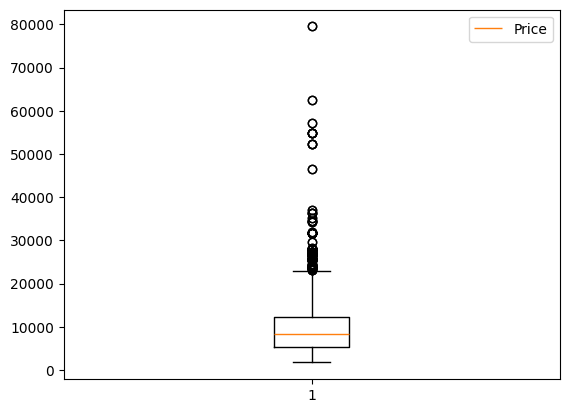

In [86]:
sort_pri=final_df.sort_values(by='Price',ascending=True)
plt.boxplot(sort_pri['Price'],label='Price')
plt.legend()
plt.show()